In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
X_train = pd.read_csv('Chemical Seg/Logistic_X_Train.csv')
Y_train = pd.read_csv('Chemical Seg/Logistic_Y_Train.csv')
X_test = pd.read_csv('Chemical Seg/Logistic_X_Test.csv')

In [3]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values

In [7]:
print(X_train.shape,Y_train.shape,X_test.shape)

(3000, 3) (3000, 1) (1000, 3)


In [6]:
print(X_train[:5])

[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 [ 1.33597757  1.34865062  1.43356425]
 [ 0.6589252   1.30001883  0.57160271]]


In [8]:
print(X_test[:5])

[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 [-1.29825474  1.04976112 -0.52731909]
 [-0.96471175  0.93808838 -1.18632767]]


In [9]:
print(Y_train[:5])

[[1]
 [1]
 [1]
 [0]
 [0]]


In [10]:
Y_train = Y_train[:,-1]

In [11]:
print(Y_train.shape)

(3000,)


In [12]:
def hypothesis(x,w,b):
    h = np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1/(1+np.exp(-1*z))

def error(y_true,x,w,b):
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    return -err/m

def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i]-hx)*x[i]
        grad_b += (y_true[i]-hx)  # here i commit mistake
        
    grad_w /=m
    grad_b /=m
    
    return [grad_w,grad_b]
#one iteration of gradient descent
def grad_descent(x,y_true,w,b,learning_rate = 0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b

def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [13]:
loss = []
W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [14]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    #acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)
    

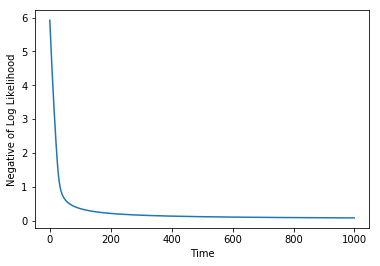

In [15]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [16]:
print(W,b)

[-2.09342778  1.37251125 -2.54390168] -1.471090139144781


In [17]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [18]:
csv_data = [['label']]
for n in range(X_test.shape[0]):
    pred = predict(X_test[n],W,b)
    csv_data.append([int(pred)])

In [21]:
file = open('Chemical Seg/sample1.csv','w+')
for row in csv_data:
    file.write(str(row[0])+'\n')
    
file.close()